In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importing the route data

In [5]:
# Get Directory
BASE_DIR = "D:/Code/RoutingChallenge/routing-challenge-az"

training_routes_path=os.path.join(BASE_DIR, 'data/model_build_inputs/route_data.json')

# Read route data
print('Reading Input Data')
df_route_data = pd.read_json(training_routes_path).T

Reading Input Data


In [6]:
df_route_data.shape

(6112, 6)

In [10]:
df_route_data.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ..."
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ..."
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't..."
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ..."
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '..."


In [11]:
df_route_data['num_stops'] = df_route_data['stops'].apply(lambda x: len(x))

In [12]:
df_stops = df_route_data[['station_code','stops','num_stops']]

In [13]:
df_stops.head()

,station_code,stops,num_stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ...",119
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ...",106
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't...",128
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ...",142
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '...",155


What does a stop look like?

In [47]:
pd.DataFrame(df_stops.iloc[0,:]['stops']).T.head()

,lat,lng,type,zone_id
AD,34.099611,-118.283062,Dropoff,P-12.3C
AF,34.101587,-118.291125,Dropoff,A-1.2D
AG,34.089727,-118.28553,Dropoff,A-2.1A
BA,34.096132,-118.292869,Dropoff,A-1.2C
BE,34.098482,-118.286243,Dropoff,P-13.3B


## Visualizing the stops on a graph
Here, we exclude the station since it distorts the graph

In [111]:
def visualize_stops(df_stops,i,exclude_station=True):
    stops = pd.DataFrame(df_stops.iloc[i,:]['stops']).T
    station = stops[stops['type']=='Station']
    if exclude_station:        
        stops = stops[stops['type']!='Station']
#     print(stops)
    plt.figure(figsize=(10,7),dpi=300)
    plt.scatter(stops['lat'],stops['lng'])
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title(f"Stops for route: {df_stops.index[i]}")
    plt.show()
    print(f"Station data:\nLatitude:{station.iloc[0,0]:13}")
    print(f"Longitude:{station.iloc[0,1]:13}")
    

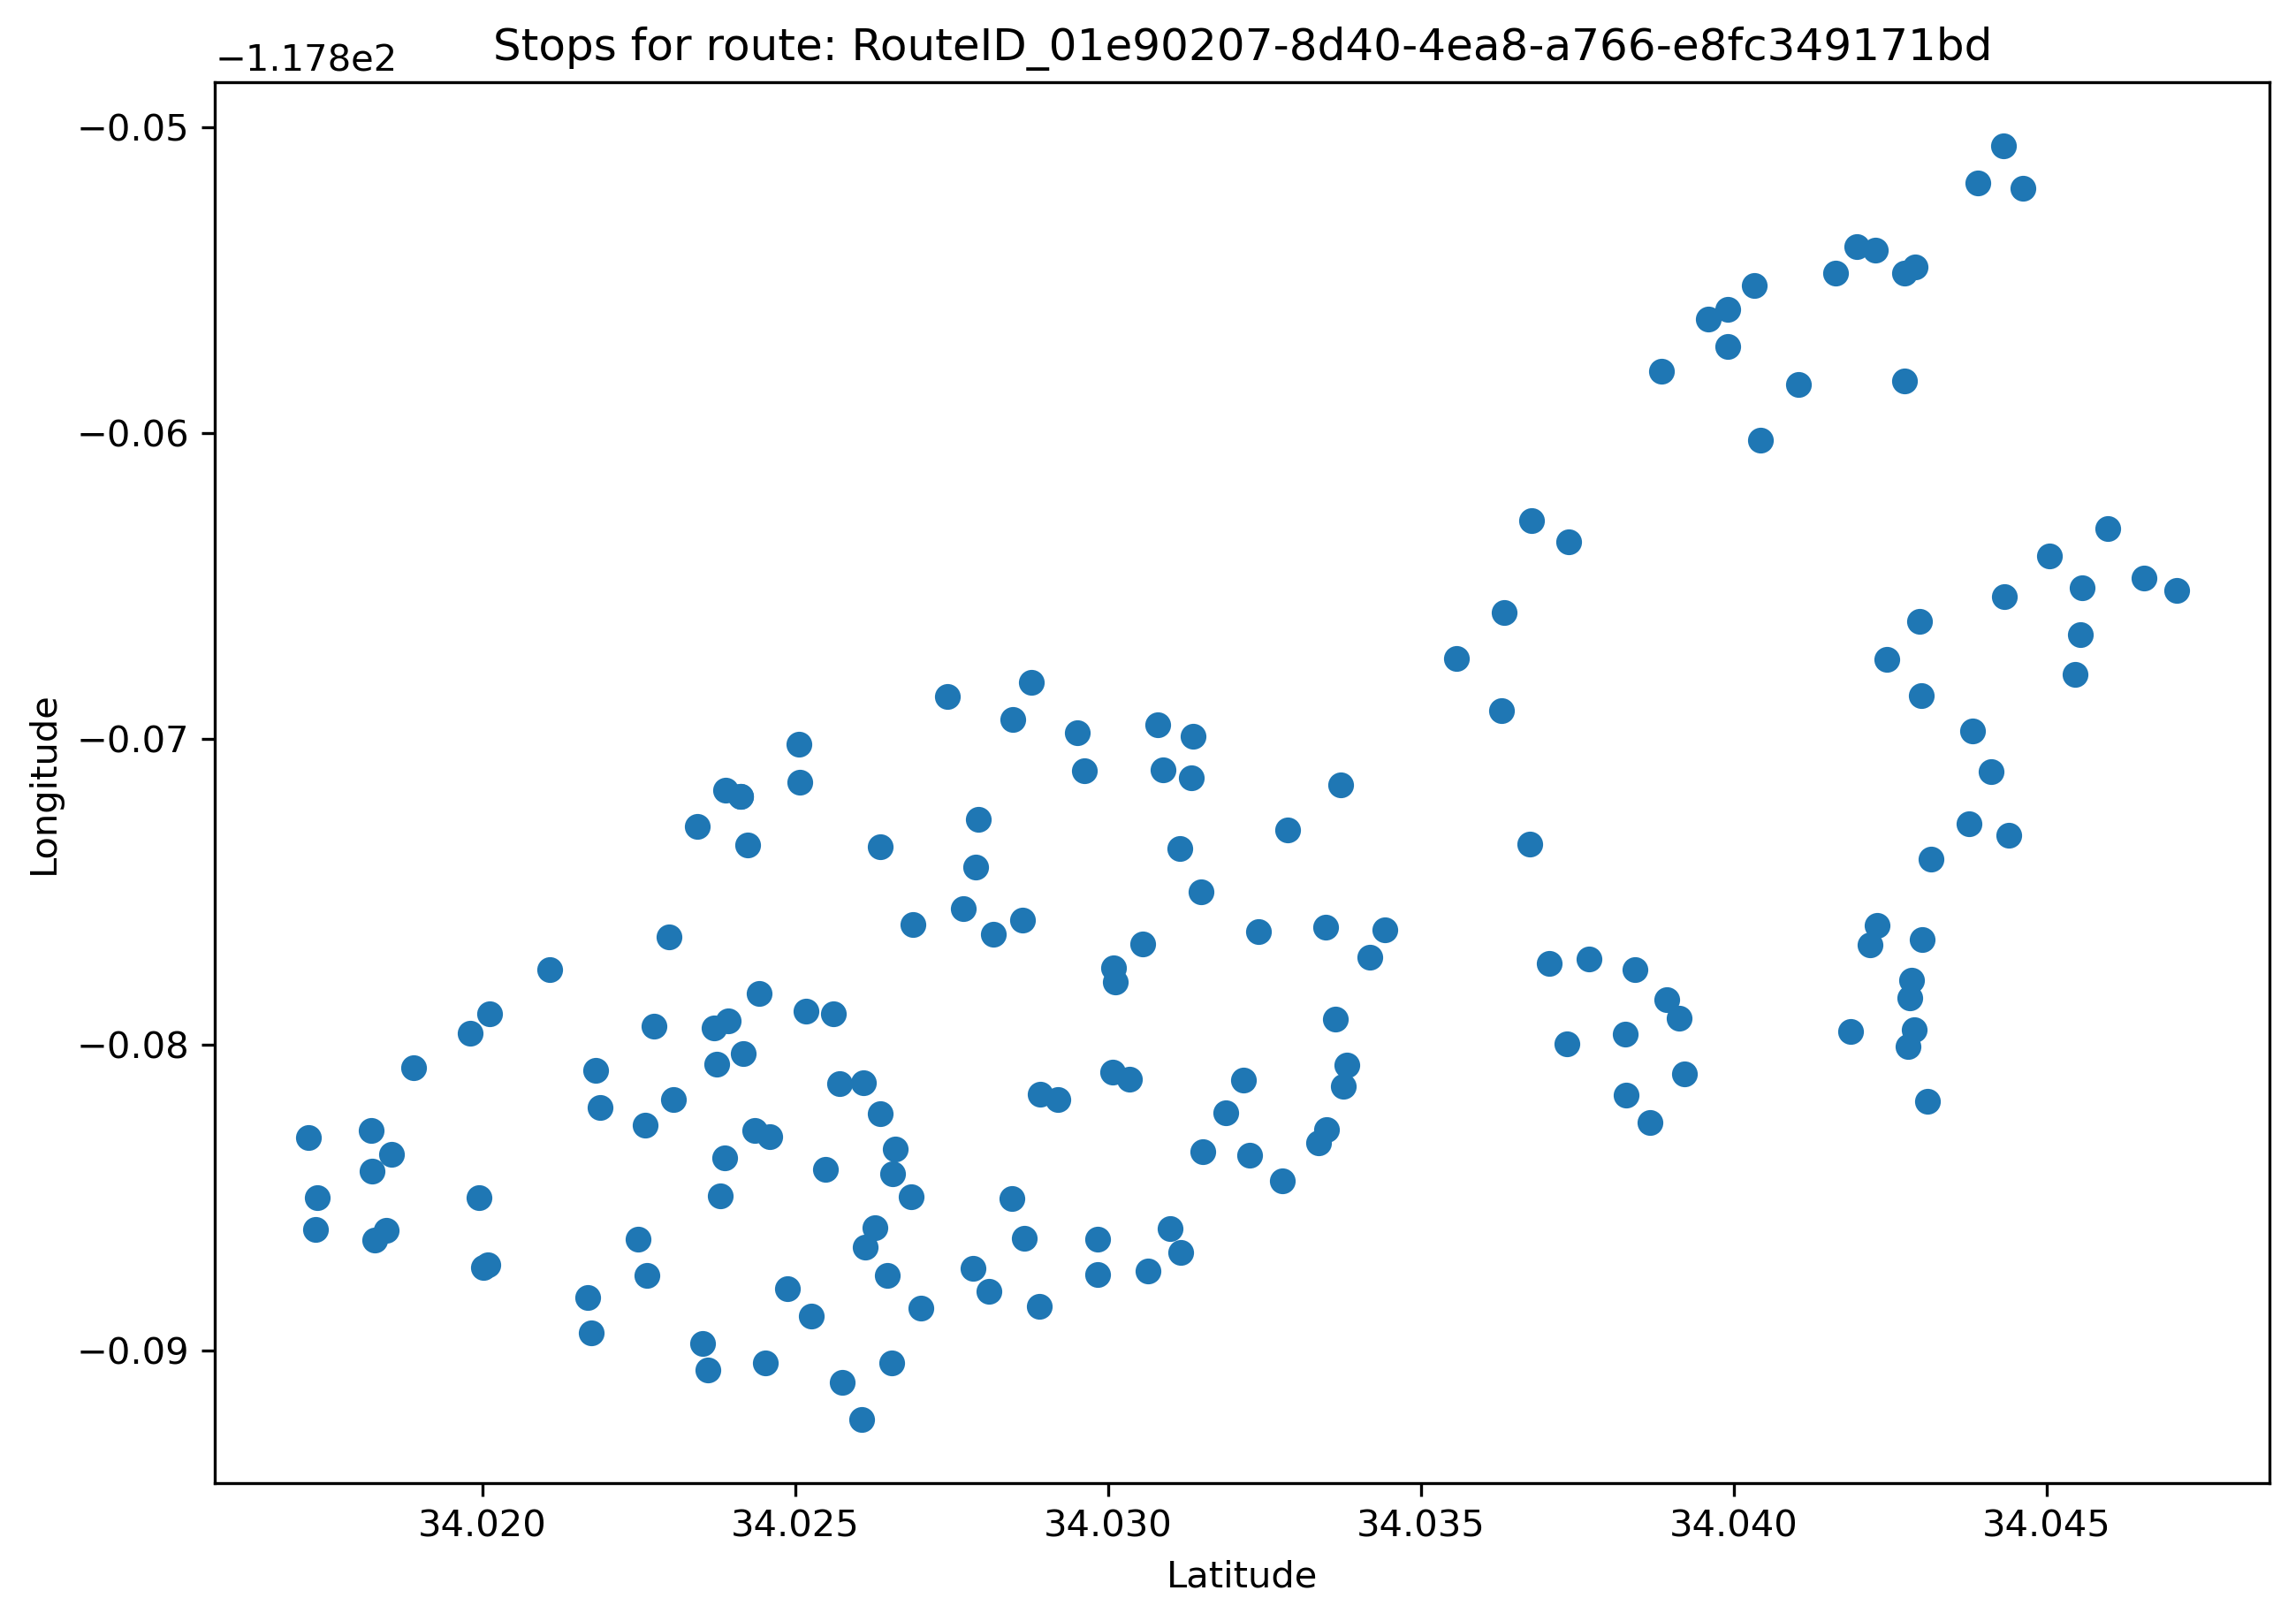

Station data:
Latitude:    33.965477
Longitude:  -117.653303


In [115]:
i=54
visualize_stops(df_stops,i,exclude_station=True)

## Getting the actual route sequence data

In [117]:
training_routes_seq=os.path.join(BASE_DIR, 'data/model_build_inputs/actual_sequences.json')

# Read route data
print('Reading Input Data')
df_seq = pd.read_json(training_routes_seq).T

Reading Input Data


In [118]:
df_seq.shape

(6112, 1)

In [150]:
def visualize_route_seq(df_stops,df_seq,i,exclude_station=True):
    stops = pd.DataFrame(df_stops.iloc[i,:]['stops']).T
    station = stops[stops['type']=='Station']
    if exclude_station:        
        stops = stops[stops['type']!='Station']
#     print(stops)
    plt.figure(figsize=(10,7),dpi=300)
#     plt.scatter(stops['lat'],stops['lng'])
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title(f"Stops for route: {df_stops.index[i]}")
#     plt.show()
    print(f"Station data:\nLatitude:{station.iloc[0,0]:13}")
    print(f"Longitude:{station.iloc[0,1]:13}")
    
    seq = pd.Series(df_seq.iloc[i,0]).sort_values().index.to_list()
    if exclude_station:
        seq = seq[1:]
    plt.plot(stops['lat'][seq],stops['lng'][seq],'.-')
    

Station data:
Latitude:    33.918699
Longitude:  -118.324843


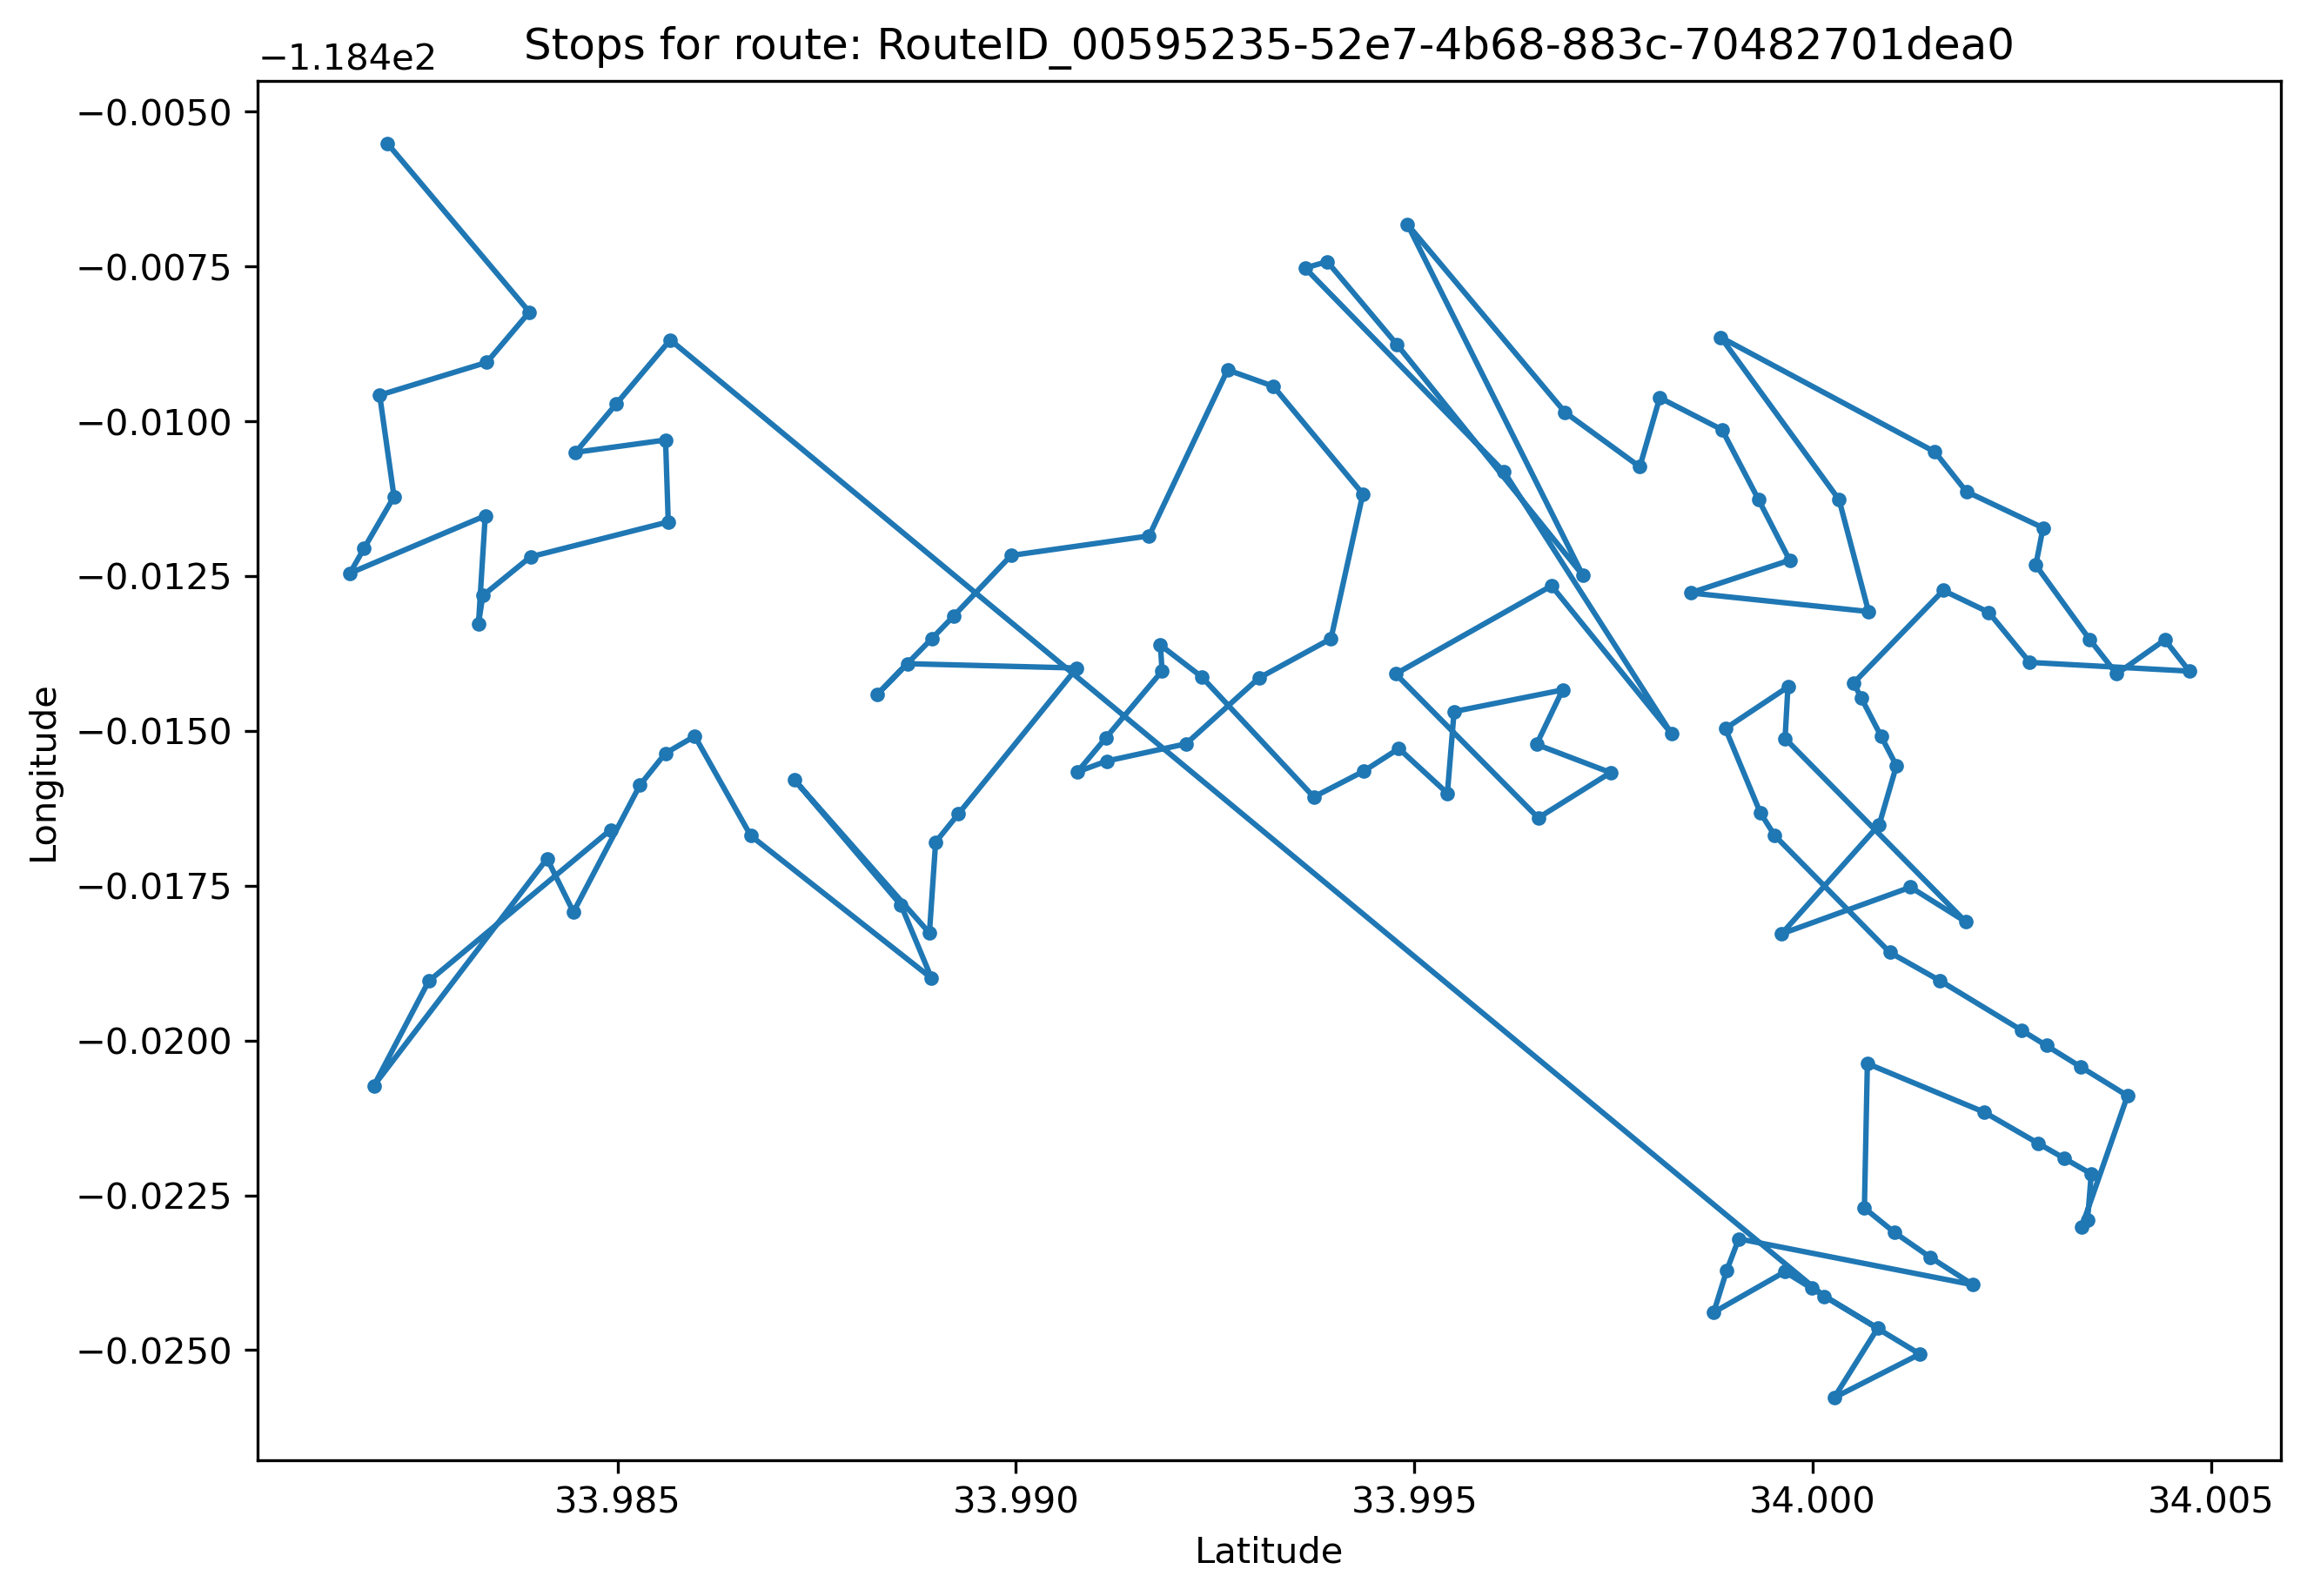

In [158]:
i=10
visualize_route_seq(df_stops,df_seq,i,exclude_station=True)

### We also want to visualize the time windows

In [152]:
packages_path=os.path.join(BASE_DIR, 'data/model_build_inputs/package_data.json')

# Read route data
print('Reading Input Data')
df_pkg = pd.read_json(packages_path).T

Reading Input Data


In [153]:
df_pkg.shape

(6112, 675)

In [161]:
df_pkg.iloc[0,:].dropna().iloc[54]

{'PackageID_beb78639-3b7a-4c5b-b8e4-d5897ab4fc4f': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': None, 'end_time_utc': None},
  'planned_service_time_seconds': 58.6,
  'dimensions': {'depth_cm': 33.0, 'height_cm': 20.3, 'width_cm': 26.7}},
 'PackageID_03c21f21-61f6-470b-a564-ec38d394b3a5': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': None, 'end_time_utc': None},
  'planned_service_time_seconds': 58.6,
  'dimensions': {'depth_cm': 25.4, 'height_cm': 7.6, 'width_cm': 17.8}},
 'PackageID_5b256aa2-4e08-4841-b56c-6752a92498e2': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': None, 'end_time_utc': None},
  'planned_service_time_seconds': 58.6,
  'dimensions': {'depth_cm': 43.2, 'height_cm': 7.6, 'width_cm': 27.9}},
 'PackageID_1b91ddbd-b47c-4612-87e7-d778cd6edf2c': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': None, 'end_time_utc': None},
  'planned_service_time_seconds': 58.6,
  'dimensions': {'depth_cm': 31.0, 'heig